In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('/content/TB_Burden_Country.csv')

# Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 47 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Country or territory name                                                                       5120 non-null   object 
 1   ISO 2-character country/territory code                                                          5096 non-null   object 
 2   ISO 3-character country/territory code                                                          5120 non-null   object 
 3   ISO numeric country/territory code                                                              5120 non-null   int64  
 4   Region                                                                                          5120 non-null   object 
 5   Year         

In [6]:
df.describe()

,ISO numeric country/territory code,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",Estimated prevalence of TB (all forms),"Estimated prevalence of TB (all forms), low bound","Estimated prevalence of TB (all forms), high bound","Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
count,5120.000000,5120.000000,5.120000e+03,5120.000000,5100.000000,5100.000000,5.120000e+03,5.100000e+03,5.100000e+03,5120.000000,...,3645.000000,3642.000000,3642.000000,3645.000000,3642.000000,3642.000000,0.0,4671.000000,4671.000000,4671.000000
mean,433.576563,2001.549023,2.915671e+07,194.386100,101.815353,321.006367,6.654332e+04,4.615915e+04,9.319791e+04,20.174426,...,40.228274,33.892320,47.326378,6095.426979,5215.147573,7363.644445,NaN,68.217851,61.959409,75.854492
std,255.116018,6.933272,1.183725e+08,259.016385,145.259349,421.326139,3.249488e+05,2.711918e+05,3.938631e+05,32.893800,...,125.175567,105.557348,147.004849,22807.804792,19993.703601,26548.834113,NaN,25.465391,23.603155,29.277633
min,4.000000,1990.000000,1.129000e+03,0.000000,0.110000,0.770000,0.000000e+00,2.000000e-02,1.600000e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,NaN,0.000000,0.000000,0.000000
25%,212.000000,1996.000000,5.601190e+05,23.000000,10.000000,43.000000,3.800000e+02,1.700000e+02,7.200000e+02,1.300000,...,0.190000,0.130000,0.240000,18.000000,12.000000,25.000000,NaN,52.000000,46.000000,59.000000
50%,430.000000,2002.000000,5.172118e+06,85.000000,40.000000,147.000000,4.300000e+03,2.100000e+03,7.700000e+03,5.400000,...,2.100000,1.700000,2.600000,170.000000,130.000000,220.000000,NaN,75.000000,68.000000,82.000000
75%,646.000000,2008.000000,1.752404e+07,272.000000,139.000000,447.000000,2.700000e+04,1.400000e+04,4.500000e+04,25.000000,...,14.000000,12.000000,17.000000,1700.000000,1400.000000,2000.000000,NaN,87.000000,77.000000,95.000000
max,894.000000,2013.000000,1.385567e+09,1762.000000,1316.000000,3038.000000,4.600000e+06,4.000000e+06,5.200000e+06,278.000000,...,1063.000000,981.000000,1438.000000,320000.000000,290000.000000,350000.000000,NaN,320.000000,270.000000,380.000000


In [7]:
df.head()

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,306.0,156.0,506.0,...,0.11,0.08,0.14,12.0,9.4,16.0,NaN,20.0,15.0,24.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,343.0,178.0,562.0,...,0.13,0.11,0.16,17.0,14.0,20.0,NaN,96.0,80.0,110.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,371.0,189.0,614.0,...,0.16,0.14,0.18,22.0,19.0,24.0,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,392.0,194.0,657.0,...,0.19,0.17,0.21,28.0,25.0,31.0,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,410.0,198.0,697.0,...,0.21,0.18,0.24,35.0,30.0,39.0,NaN,NaN,NaN,NaN


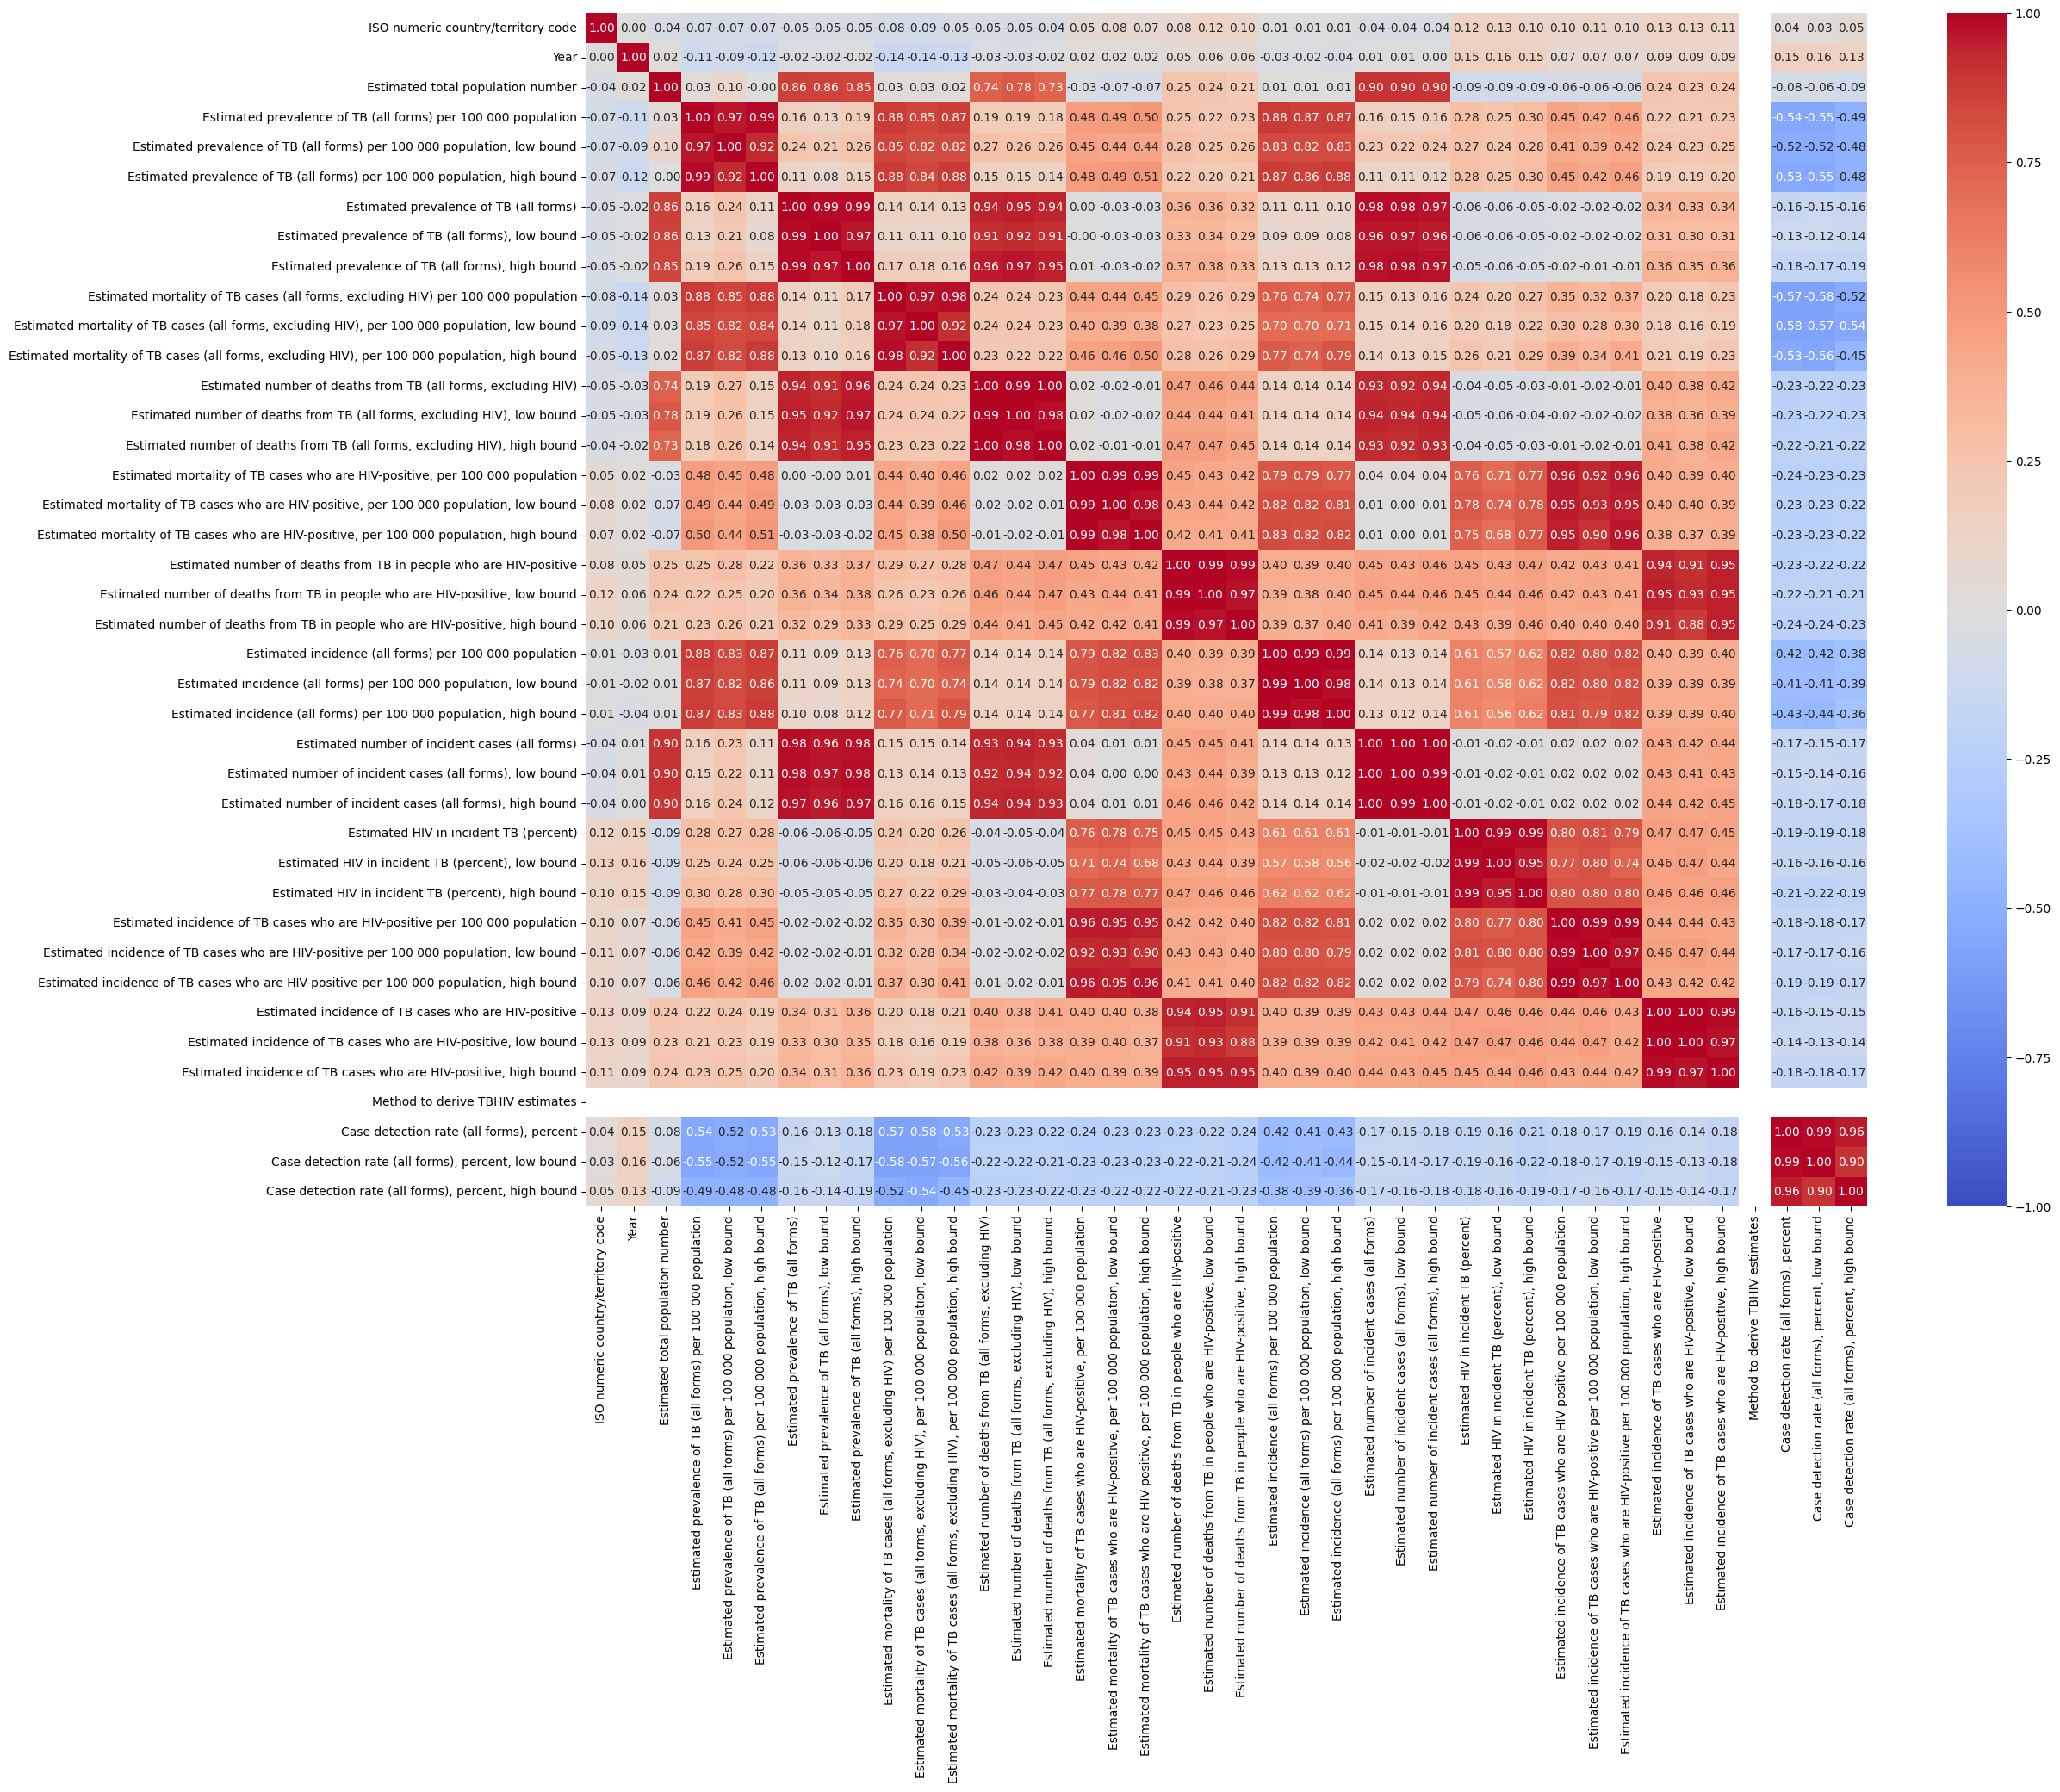

In [8]:
# Correlation between numerical features
df_numerical = df.select_dtypes(include=np.number)
# df_numerical.info()
corr = df_numerical.corr()
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

plt.show()

In [9]:
df = df.drop(columns='Method to derive TBHIV estimates')
df = df.drop(columns='Country or territory name')
df = df.drop(columns='ISO 2-character country/territory code')
df = df.drop(columns='ISO 3-character country/territory code')

In [10]:
print(df['Region'].unique())
print(df['Method to derive prevalence estimates'].unique())
print(df['Method to derive mortality estimates'].unique())
print(df['Method to derive incidence estimates'].unique())

label_mapping_region = {
    'EMR': 1,
    'EUR': 2,
    'AFR': 3,
    'WPR': 4,
    'AMR': 5,
    'SEA': 6
}

label_mapping_pre_est = {'predicted': 1,
    'survey imputed': 2,
    'survey': 3,
    'NTP': 4,
    'pooled surveys': 5
}

label_mapping_mor_est = {'Indirect': 1,
                         'VR imputed': 2,
                         'VR': 3
                         }

label_mapping_inc_est = {
    'High income': 1,
    'Mortality': 2,
    'Trends ARI': 3,
    'Expert opinion': 4,
    'Prevalence': 5,
    'Capture-recapture': 6,
    'Survey': 7,
    'Neighbour': 8
}

df['Region'] = df['Region'].map(label_mapping_region)
df['Method to derive prevalence estimates'] = df['Method to derive prevalence estimates'].map(label_mapping_pre_est)
df['Method to derive mortality estimates'] = df['Method to derive mortality estimates'].map(label_mapping_mor_est)
df['Method to derive incidence estimates'] = df['Method to derive incidence estimates'].map(label_mapping_inc_est)

['EMR' 'EUR' 'AFR' 'WPR' 'AMR' 'SEA']
['predicted' 'survey imputed' 'survey' 'NTP' 'pooled surveys']
['Indirect' 'VR imputed' 'VR']
[nan 'High income' 'Mortality' 'Expert opinion' 'Trends ARI' 'Prevalence'
 'Capture-recapture' 'Survey' 'Neighbour']


In [11]:
df.isnull().sum()

,0
ISO numeric country/territory code,0
Region,0
Year,0
Estimated total population number,0
Estimated prevalence of TB (all forms) per 100 000 population,0
"Estimated prevalence of TB (all forms) per 100 000 population, low bound",20
"Estimated prevalence of TB (all forms) per 100 000 population, high bound",20
Estimated prevalence of TB (all forms),0
"Estimated prevalence of TB (all forms), low bound",20
"Estimated prevalence of TB (all forms), high bound",20


In [12]:
# How is this work
region_method_map = df[df['Method to derive incidence estimates'].notnull()].groupby('Region')['Method to derive incidence estimates'].agg(lambda x: x.mode()[0])

df['Method to derive incidence estimates'] = df['Method to derive incidence estimates'].fillna(
    df['Region'].map(region_method_map)
)

In [13]:
from sklearn.linear_model import LinearRegression
import pandas as pd

arr_j = [
    'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
    'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
    'Estimated prevalence of TB (all forms), low bound',
    'Estimated prevalence of TB (all forms), high bound',
    'Estimated incidence (all forms) per 100 000 population, low bound',
    'Estimated incidence (all forms) per 100 000 population, high bound',
    'Estimated number of incident cases (all forms), low bound',
    'Estimated number of incident cases (all forms), high bound',
    'Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound',
    'Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound',
    'Estimated number of deaths from TB in people who are HIV-positive, low bound',
    'Estimated number of deaths from TB in people who are HIV-positive, high bound'
    ]

arr_i = ['Estimated prevalence of TB (all forms) per 100 000 population',
         'Estimated prevalence of TB (all forms)',
         'Estimated incidence (all forms) per 100 000 population',
         'Estimated number of incident cases (all forms)',
         'Estimated mortality of TB cases who are HIV-positive, per 100 000 population',
         'Estimated number of deaths from TB in people who are HIV-positive'
         ]

for i in range(len(arr_i)):
  for j in range(2):
    # Buat salinan agar tidak merusak data asli
    df_copy = df.copy()

    # Target imputasi 1: low bound
    mask_low = df_copy[arr_j[2*i+j]].isnull()
    train_low = df_copy[~mask_low]
    test_low = df_copy[mask_low]

    # Model regresi untuk low bound
    model_low = LinearRegression()
    model_low.fit(
        train_low[[arr_i[i]]],
        train_low[arr_j[2*i+j]]
    )

    # Imputasi
    df_copy.loc[mask_low, arr_j[2*i+j]] = model_low.predict(
        test_low[[arr_i[i]]]
    )

    df = df_copy

In [14]:
# from sklearn.impute import KNNImputer

# cols = ['Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound',
#         'Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound',
#         'Estimated number of deaths from TB in people who are HIV-positive, low bound',
#         'Estimated number of deaths from TB in people who are HIV-positive, high bound'
# ]

# df_impute = df[cols + ['Estimated number of deaths from TB in people who are HIV-positive']]

# imputer = KNNImputer(n_neighbors=5)
# imputed = imputer.fit_transform(df_impute)

# df_imputed = pd.DataFrame(imputed, columns=df_impute.columns, index=df.index)
# df[cols] = df_imputed[cols]

In [15]:
# df_imputed.isnull().sum()

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

cols = [
    'Estimated HIV in incident TB (percent)',
    'Estimated HIV in incident TB (percent), low bound',
    'Estimated HIV in incident TB (percent), high bound',
    'Estimated incidence of TB cases who are HIV-positive per 100 000 population',
    'Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound',
    'Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound',
    'Estimated incidence of TB cases who are HIV-positive',
    'Estimated incidence of TB cases who are HIV-positive, low bound',
    'Estimated incidence of TB cases who are HIV-positive, high bound',
    'Case detection rate (all forms), percent',
    'Case detection rate (all forms), percent, low bound',
    'Case detection rate (all forms), percent, high bound'
]

imp = IterativeImputer(max_iter=10, random_state=0)
df[cols] = imp.fit_transform(df[cols])


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [17]:
cat_cols = df.select_dtypes(include='object').columns
missing_cat = df[cat_cols].isnull().sum()
missing_cat = missing_cat[missing_cat > 0]
print(missing_cat)

for col in missing_cat.index:
    print(df[col].value_counts(dropna=False))
    print('-' * 50)

Series([], dtype: float64)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Model will not use 'Estimated incidence (all forms) per 100 000 population, low bound' and 'Estimated incidence (all forms) per 100 000 population, high bound' to prevent data leakage
X = df.drop(columns=['Estimated incidence (all forms) per 100 000 population', 'Estimated incidence (all forms) per 100 000 population, low bound', 'Estimated incidence (all forms) per 100 000 population, high bound'])
y = df['Estimated incidence (all forms) per 100 000 population']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50
)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

# Metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score Linear Regression: {r2:.2f}")


Mean Squared Error: 728.94
R2 Score Linear Regression: 0.98


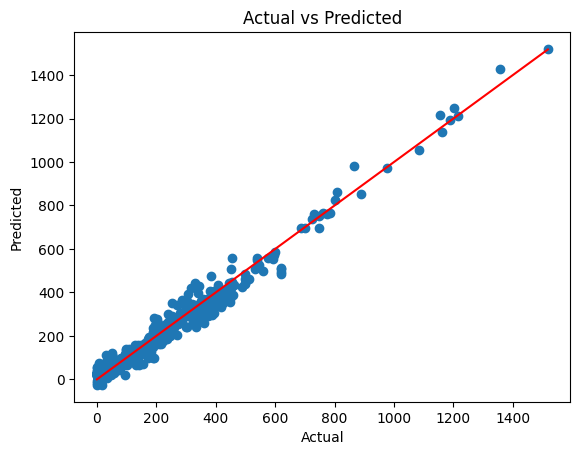

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=50)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"R2 Score Random Forest: {r2_score(y_test, y_pred):.2f}")


R2 Score Random Forest: 0.99


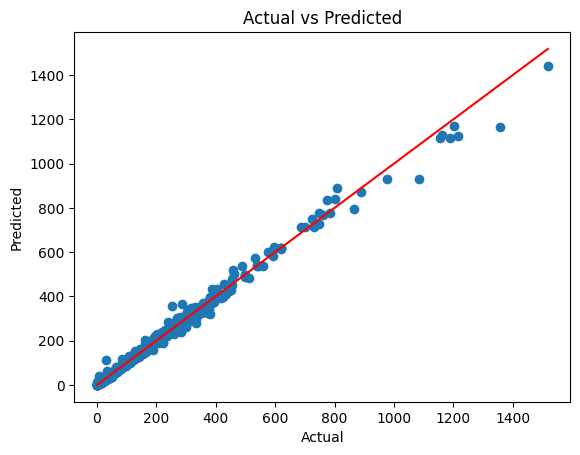

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()